## Import Libraries and Pull Data

Import Libraries and Frameworks and Pull Data from url

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
import warnings
warnings.filterwarnings('ignore')

url = 'https://raw.githubusercontent.com/Toad234/XLSXFile/main/Data2(with%20extra%20info%20for%20consistent%20onehot).csv'
data = pd.read_csv(url) 
# Please note that 3 rows were added to the begining of the data. 
# Each of the 3 rows is entirely A, N, or P 
# This was done for easier understanding when using OneHotEncoding
data

,X1,X2,X3,X4,X5,X6,Y1
0,P,P,P,P,P,P,NB
1,A,A,A,A,A,A,B
2,N,N,N,N,N,N,NB
3,P,P,A,A,A,P,NB
4,N,N,A,A,A,N,NB
...,...,...,...,...,...,...,...
248,N,N,A,N,N,N,B
249,P,N,N,N,N,N,B
250,A,N,N,N,N,N,B
251,N,N,N,N,N,N,B



Utilize One Hot Encoding on the Data Set

In [ ]:
oHE = OneHotEncoder()

def oneHotToCharAttribute(i):
  
  if(i==1):
      return "A"
  elif (i==2):
    return "N"
  else:
    return "P"

def oneHotToCharOutput(i):
  if(i==1):
      return "B"
  else:
    return "NB"
 
  
#start one hot encoding
X1 = oHE.fit_transform(data.X1.values.reshape(-1,1)).toarray()
X2 = oHE.fit_transform(data.X2.values.reshape(-1,1)).toarray()
X3 = oHE.fit_transform(data.X3.values.reshape(-1,1)).toarray()
X4 = oHE.fit_transform(data.X4.values.reshape(-1,1)).toarray()
X5 = oHE.fit_transform(data.X5.values.reshape(-1,1)).toarray()
X6 = oHE.fit_transform(data.X6.values.reshape(-1,1)).toarray()
Y1 = oHE.fit_transform(data.Y1.values.reshape(-1,1)).toarray()

dfOneHotX1 = pd.DataFrame(X1, columns = ["X1_"+ oneHotToCharAttribute(i) for i in range(1,4)]) 
dfOneHotX2 = pd.DataFrame(X2, columns = ["X2_"+oneHotToCharAttribute(i) for i in range(1,4)]) 
dfOneHotX3 = pd.DataFrame(X3, columns = ["X3_"+oneHotToCharAttribute(i) for i in range(1,4)]) 
dfOneHotX4 = pd.DataFrame(X4, columns = ["X4_"+oneHotToCharAttribute(i) for i in range(1,4)]) 
dfOneHotX5 = pd.DataFrame(X5, columns = ["X5_"+oneHotToCharAttribute(i) for i in range(1,4)]) 
dfOneHotX6 = pd.DataFrame(X6, columns = ["X6_"+oneHotToCharAttribute(i) for i in range(1,4)]) 
dfOneHotY1 = pd.DataFrame(Y1, columns = ["Y1_"+ oneHotToCharOutput(i) for i in range(1,3)]) 


df = pd.concat([dfOneHotX1, dfOneHotX2, dfOneHotX3,dfOneHotX4,dfOneHotX5, dfOneHotX6 ,dfOneHotY1], axis=1)
df = df.iloc[3:].reset_index(drop=True) #remove first 3 indexs bc they were used to make one hot encoding easy to read and reindex
X = pd.concat([dfOneHotX1, dfOneHotX2, dfOneHotX3,dfOneHotX4,dfOneHotX5, dfOneHotX6 ], axis=1)
X = X.iloc[3:].reset_index(drop=True)
YB = dfOneHotY1.loc[:,"Y1_B"]
YB = YB.iloc[3:].reset_index(drop=True)

X

,X1_A,X1_N,X1_P,X2_A,X2_N,X2_P,X3_A,X3_N,X3_P,X4_A,X4_N,X4_P,X5_A,X5_N,X5_P,X6_A,X6_N,X6_P
0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
246,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
247,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
248,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Initialize Classes and Functions

In [ ]:
logistic = lambda z: 1./ (1 + np.exp(-z))
def gradient(self, x, y):
    N,D = x.shape
    yh = logistic(np.dot(x, self.w))    # predictions  size N
    grad = np.dot(x.T, yh - y)/N        # divide by N because cost is mean over N points
    return grad   

In [ ]:
class LogisticRegression:
    
    def __init__(self, add_bias=True, learning_rate=.1, epsilon=1e-4, max_iters=1e4, verbose=False):
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon                        #to get the tolerance for the norm of gradients 
        self.max_iters = max_iters                    #maximum number of iteration of gradient descent
        self.verbose = verbose
        
    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape
        self.w = np.zeros(D)
        g = np.inf 
        t = 0
        # the code snippet below is for gradient descent
        while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
            
            g = self.gradient(x, y)
            
            self.w = self.w - self.learning_rate * g 
            t += 1
        
        if self.verbose:
            print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
            print(f'the weight found: {self.w}')
        
        return self
    
    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(Nt)])
        yh = logistic(np.dot(x,self.w))            #predict output
        return yh

LogisticRegression.gradient = gradient             #initialize the gradient method of the LogisticRegression class with gradient function

Implement Cross Entropy Function

In [ ]:
def cost_fn(x, y, w):
    N, D = x.shape                                                       
    z = np.dot(x, w)
    J = np.mean(y * np.log1p(np.exp(-z)) + (1-y) * np.log1p(np.exp(z)))  #log1p calculates log(1+x) to remove floating point inaccuracies 
    return J

## 80/20 Test/Train Split

Split data (80/20)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, YB, test_size=0.2, random_state=101)
X_train=X_train.sort_index(axis=0)#sorting for graphical purposes. 
y_train=y_train.sort_index(axis=0)#sorting for graphical purposes. 
X_test=X_test.sort_index(axis=0)#sorting for graphical purposes. 
y_test=y_test.sort_index(axis=0)#sorting for graphical purposes.

Predict Test data and Plot Curve

In [ ]:
model= LogisticRegression()
yh_test=model.fit(X_train,y_train).predict(X_test)
sns.scatterplot(x=X.index,y= YB, color = 'red', marker= '^')
plt.plot(X_test.index, yh_test, 'g', alpha=.5, label='predictions')


Streaming output truncated to the last 5000 lines.
a(19,)
(200, 19)
(200,)
(200, 19)
a(19,)
(200, 19)
(200,)
(200, 19)
a(19,)
(200, 19)
(200,)
(200, 19)
a(19,)
(200, 19)
(200,)
(200, 19)
a(19,)
(200, 19)
(200,)
(200, 19)
a(19,)
(200, 19)
(200,)
(200, 19)
a(19,)
(200, 19)
(200,)
(200, 19)
a(19,)
(200, 19)
(200,)
(200, 19)
a(19,)
(200, 19)
(200,)
(200, 19)
a(19,)
(200, 19)
(200,)
(200, 19)
a(19,)
(200, 19)
(200,)
(200, 19)
a(19,)
(200, 19)
(200,)
(200, 19)
a(19,)
(200, 19)
(200,)
(200, 19)
a(19,)
(200, 19)
(200,)
(200, 19)
a(19,)
(200, 19)
(200,)
(200, 19)
a(19,)
(200, 19)
(200,)
(200, 19)
a(19,)
(200, 19)
(200,)
(200, 19)
a(19,)
(200, 19)
(200,)
(200, 19)
a(19,)
(200, 19)
(200,)
(200, 19)
a(19,)
(200, 19)
(200,)
(200, 19)
a(19,)
(200, 19)
(200,)
(200, 19)
a(19,)
(200, 19)
(200,)
(200, 19)
a(19,)
(200, 19)
(200,)
(200, 19)
a(19,)
(200, 19)
(200,)
(200, 19)
a(19,)
(200, 19)
(200,)
(200, 19)
a(19,)
(200, 19)
(200,)
(200, 19)
a(19,)
(200, 19)
(200,)
(200, 19)
a(19,)
(200, 19)
(200,)
(200, 1

KeyboardInterrupt: ignored

Plot Error per Datapoint as Scatter Plot

0.0009190287822927073


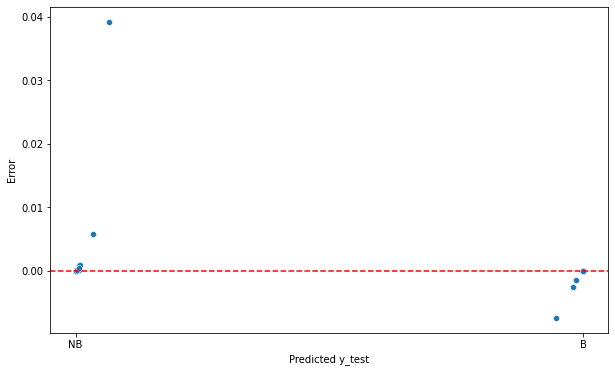

In [ ]:
test_res=[]
j=0
total=0
for i in X_test.index:
  total+=yh_test[j] - y_test[i]
  test_res.append(yh_test[j] - y_test[i])
  j+=1

print(total/len(sum))



fig, ax = plt.subplots(figsize=(10, 6))

xs = [0,1]
labels = ['NB','B']
plt.xlabel("Predicted y_test")
plt.ylabel("Error")
plt.xticks(xs,labels)
sns.scatterplot(x=yh_test, y=sum)
plt.axhline(y = 0, color='r', linestyle='--')



Plot Error per Datapoint as Displot

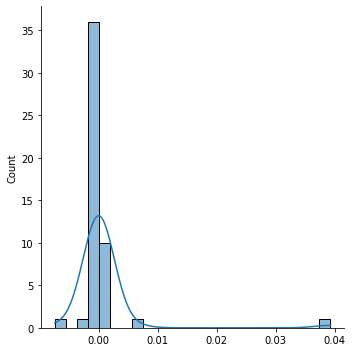

In [ ]:
sns.displot(sum,bins=25,kde=True)

Predict Train Data and Plot Curve

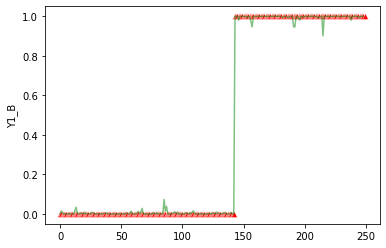

In [ ]:
model= LogisticRegression()
yh_train=model.fit(X_train,y_train).predict(X_train)
sns.scatterplot(x=X.index,y= YB, color = 'red', marker= '^')
plt.plot(X_train.index, yh_train, 'g', alpha=.5, label='predictions')


## Test Different Test Splits and Learning Rates

Test different train/test splits

In [ ]:

x=df[["X1_A", "X1_N", "X1_P", "X2_A", "X2_N", "X2_P","X3_A", "X3_N", "X3_P","X4_A", "X4_N", "X4_P","X5_A", "X5_N", "X5_P","X6_A", "X6_N", "X6_P"]].to_numpy()
yt=df[["Y1_B"]].to_numpy().transpose()
test_sum_cost=[]
train_sum_cost=[]
weights=[[0.]*19]*7 #[7[19]]
print(weights)
for i in range(20,90,10):
  test_sum_cost_index=0
  train_sum_cost_index=0
  for j in range(0,10):
      model= LogisticRegression()
      X_train, X_test, y_train, y_test = train_test_split(X, YB, test_size=i/100, random_state=101)
     
     
      yh_test=model.fit(X_train,y_train).predict(X_test)
      if model.add_bias:
        N,D = X_test.shape
        X_test = np.column_stack([X_test,np.ones(N)]) #for bias
      test_sum_cost_index = test_sum_cost_index + cost_fn(X_test, y_test, model.w)
      for k in range(0,19):
        weights[(int)(i/10) - 2][k] = weights[(int)(i/10) - 2][k] + model.w[k]

        
      yh_train=model.fit(X_train,y_train).predict(X_train)
      if model.add_bias:
        N,D = X_train.shape
        X_train = np.column_stack([X_train,np.ones(N)]) #for bias
      train_sum_cost_index = train_sum_cost_index+ cost_fn(X_train, y_train, model.w)

      

  test_sum_cost.append(test_sum_cost_index/10)
  train_sum_cost.append(train_sum_cost_index/10)
print(test_sum_cost)
print(train_sum_cost)
#trueYh= np.zeros(yh.shape[0])
#index=0
#for i in yh:
#  if i <= sum(yh)/250: #threshold recieved via testing model predict
#    trueYh[index]=1
#  index +=1
#index=0
#lastIndex=0
#for i in trueYh:
 #   if i == 1:
 #     lastIndex=index
 #     break
 #   index+=1



#68 and 215 give problems

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]
[0.004946561536399609, 0.010916889041432162, 0.009765098287562047, 0.024402195425372638, 0.023305390278909956, 0.02315733235991717, 0.022837077550988343]
[0.004136634956971141, 0.004009489558506025, 0.00420463429531624, 0.0028943750839016437, 0.00276271669817003, 0.002624847612169489, 0.002631175875413409]


Plot different test train splits

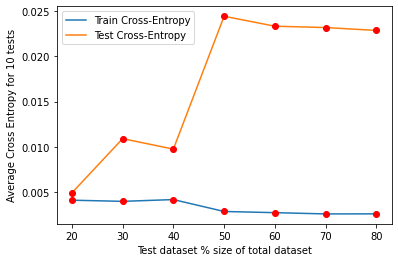

In [ ]:
plt.plot(range(20,90,10) ,  train_sum_cost, label='Train Cross-Entropy')
plt.plot(range(20,90,10) ,  test_sum_cost, label='Test Cross-Entropy')
plt.plot(range(20,90,10) ,train_sum_cost,'or')
plt.plot(range(20,90,10) ,test_sum_cost,'or')
plt.xlabel("Test dataset % size of total dataset")
plt.ylabel("Average Cross Entropy for 10 tests")
plt.legend()
plt.show()

Test different learning rates

In [ ]:
x=df[["X1_A", "X1_N", "X1_P", "X2_A", "X2_N", "X2_P","X3_A", "X3_N", "X3_P","X4_A", "X4_N", "X4_P","X5_A", "X5_N", "X5_P","X6_A", "X6_N", "X6_P"]].to_numpy()
yt=df[["Y1_B"]].to_numpy().transpose()
test_sum_cost_lr=[]
train_sum_cost_lr=[]
weights=[[0.]*19]*7 #[7[19]]
print(weights)
rates=[.1, .05, .01, .005, .001]
for i in rates:
  test_sum_cost_index=0
  train_sum_cost_index=0
  for j in range(0,10):
      model= LogisticRegression(learning_rate=i)
      X_train, X_test, y_train, y_test = train_test_split(X, YB, test_size=.2, random_state=101)
     
     
      yh_test=model.fit(X_train,y_train).predict(X_test)
      if model.add_bias:
        N,D = X_test.shape
        X_test = np.column_stack([X_test,np.ones(N)]) #for bias
      test_sum_cost_index = test_sum_cost_index + cost_fn(X_test, y_test, model.w)
      for k in range(0,19):
        weights[(int)(i/10) - 2][k] = weights[(int)(i/10) - 2][k] + model.w[k]

        
      yh_train=model.fit(X_train,y_train).predict(X_train)
      if model.add_bias:
        N,D = X_train.shape
        X_train = np.column_stack([X_train,np.ones(N)]) #for bias
      train_sum_cost_index = train_sum_cost_index+ cost_fn(X_train, y_train, model.w)

      

  test_sum_cost_lr.append(test_sum_cost_index/10)
  train_sum_cost_lr.append(train_sum_cost_index/10)
print(test_sum_cost_lr)
print(train_sum_cost_lr)

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]
[0.004946561536399609, 0.00807255799369805, 0.02632381438471166, 0.04475401336440078, 0.1569700344498988]
[0.004136634956971141, 0.0075011001833144575, 0.026447339145895164, 0.04382219360445976, 0.14487186353544504]


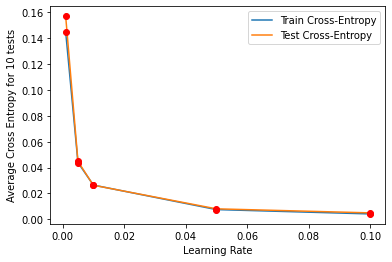

In [ ]:
plt.plot(rates ,  train_sum_cost_lr, label='Train Cross-Entropy')
plt.plot(rates ,  test_sum_cost_lr, label='Test Cross-Entropy')
plt.plot(rates,train_sum_cost_lr,'or')
plt.plot(rates ,test_sum_cost_lr,'or')
plt.xlabel("Learning Rate")
plt.ylabel("Average Cross Entropy for 10 tests")
plt.legend()
plt.show()

## Stochastic Mini-Batch

In [ ]:
class LogisticRegressionMiniBatch2: # learning rate is plotting 80/20 split. Still calculates weights correctly 
    
    def __init__(self, add_bias=True, learning_rate=.1, epsilon=1e-4, max_iters=1e2, verbose=False, mini_batch_size=10, first=True, record_history=False):
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon                        #to get the tolerance for the norm of gradients 
        self.max_iters = max_iters                    #maximum number of iteration of gradient descent
        self.verbose = verbose
        self.cost = 0
        self.mini_batch_size = mini_batch_size
        self.first = first
        self.record_history=record_history
        if record_history:
            self.cost_history = []
    def fit(self, x, y, indexes):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias and self.first:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
            self.first=False
        N,D = x.shape
      
        self.w = np.zeros(D)
        
       
        g = np.inf 
        t = 0
        # the code snippet below is for gradient descent
        
       
        while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
            for i in range(0, N, self.mini_batch_size):
              
              indices = indexes[i: i + self.mini_batch_size]
              
              indices = indices[indices<N]
              x_batch = x[indices]
              y_batch = y[indices]
              
              g = self.gradient(x_batch, y_batch)
              
              self.w = self.w - self.learning_rate * g 
              
            if self.record_history:
                cost = cost_fn(x, y,self.w)
                self.cost_history.append(cost)
               
              #append cost
            t += 1
        
        if self.verbose:
            print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
            print(f'the weight found: {self.w}')

       
        return self
    
    def predict(self, x):
        
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(Nt)])
            
        yh = logistic(np.dot(x,self.w))            #predict output
        return yh

LogisticRegressionMiniBatch2.gradient = gradient             #initialize the gradient method of the LogisticRegression class with gradient function

In [ ]:
class LogisticRegressionMiniBatch:
    
    def __init__(self, add_bias=True, learning_rate=.1, epsilon=1e-4, max_iters=1e3, verbose=False, mini_batch_size=10, first=True, record_history=False):
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon                        #to get the tolerance for the norm of gradients 
        self.max_iters = max_iters                    #maximum number of iteration of gradient descent
        self.verbose = verbose
        self.cost = 0
        self.mini_batch_size = mini_batch_size
        self.first = first
        self.record_history=record_history
        if record_history:
            self.cost_history = []
    def fit(self, x, y, indexes):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias and self.first:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
            self.first=False
        N,D = x.shape
        y = np.column_stack([y])
        self.w = np.zeros(D)
        
       
        g = np.inf 
        t = 0
        # the code snippet below is for gradient descent
        
       
        while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
           
           
            x_batch=[]
            y_batch=[]
            for i in range(0,N):
              x_batch.append(x[i])
              y_batch.append(y[i])
              if (i!=0 and ((i+1) % self.mini_batch_size==0)) or (i==N-1) :

                x_batch = np.array(x_batch)
                y_batch = np.squeeze(np.array(y_batch))
                g = self.gradient(x_batch, y_batch)
                
                self.w = self.w - self.learning_rate * g 
                x_batch=[]
                y_batch=[]
            if self.record_history:
              cost = cost_fn(x,y,self.w)
              self.cost_history.append(cost)
                
               
              #append cost
            t += 1
        
        if self.verbose:
            print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
            print(f'the weight found: {self.w}')

       
        return self
    
    def predict(self, x):
        
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(Nt)])
            
        yh = logistic(np.dot(x,self.w))            #predict output
        return yh

LogisticRegressionMiniBatch.gradient = gradient             #initialize the gradient method of the LogisticRegression class with gradient function

80/20 split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, YB, test_size=0.2, random_state=101)
X_train=X_train.sort_index(axis=0)#sorting for graphical purposes. 
y_train=y_train.sort_index(axis=0)#sorting for graphical purposes. 
X_test=X_test.sort_index(axis=0)#sorting for graphical purposes. 
y_test=y_test.sort_index(axis=0)#sorting for graphical purposes.

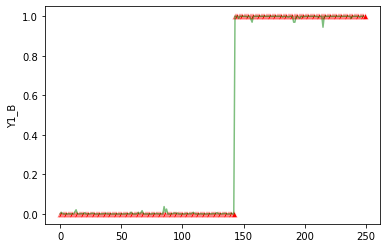

In [ ]:
model= LogisticRegressionMiniBatch()
yh_train=model.fit(X_train,y_train, X_train.index).predict(X_train)
sns.scatterplot(x=X.index,y= YB, color = 'red', marker= '^')
plt.plot(X_train.index, yh_train, 'g', alpha=.5, label='predictions')

### Performance

In [ ]:
batch_sizes = [8,12,32,64,128, 250]
test_sum_cost_mb=[]
train_sum_cost_mb=[]
for i in batch_sizes:
  train_sum_cost_index=0
  for j in range(0,10):
      model= LogisticRegressionMiniBatch(mini_batch_size=i, record_history=True)
      X_train, X_test, y_train, y_test = train_test_split(X, YB, test_size=.2, random_state=101)
      yh_train=model.fit(X_train,y_train, X_train.index).predict(X_train)
      if model.add_bias:
        N,D = X_train.shape
        X_train = np.column_stack([X_train,np.ones(N)]) #for bias
      train_sum_cost_index = train_sum_cost_index+ cost_fn(X_train, y_train, model.w)
  train_sum_cost_mb.append(train_sum_cost_index/10)

0.013157304870998577


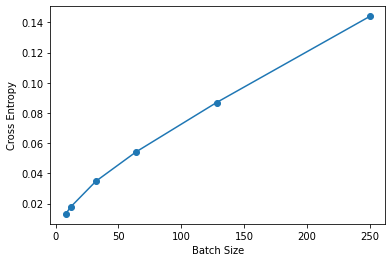

In [ ]:
print(train_sum_cost_mb[0])

plt.plot(batch_sizes, train_sum_cost_mb, '-o')
plt.xlabel('Batch Size')
plt.ylabel('Cross Entropy')
plt.show()

### Convergence Speed

In [ ]:
batch_sizes = [8,12,32,64,128, 250]
model_histories=[]

first = True
indexes=X.index
X_mb=X
YB_mb=YB
for i in batch_sizes:
    model= LogisticRegressionMiniBatch2(mini_batch_size=i, record_history=True)
    model.fit(X_mb, YB_mb, indexes)
    model_histories.append(model.cost_history)
print(len(model_histories[0]))


100


In [ ]:
def plot_convergence_speed(model_histories, batch_sizes):
    plt.figure(figsize=(10,6))
    for i, history in enumerate(model_histories):
        plt.plot(range(len(history)), history, label=f"Batch size: {batch_sizes[i]}")
    plt.xlabel('Number of Iterations')
    plt.ylabel("Cost")
    plt.legend()
    plt.title("Convergence Speed")
    plt.show()
  

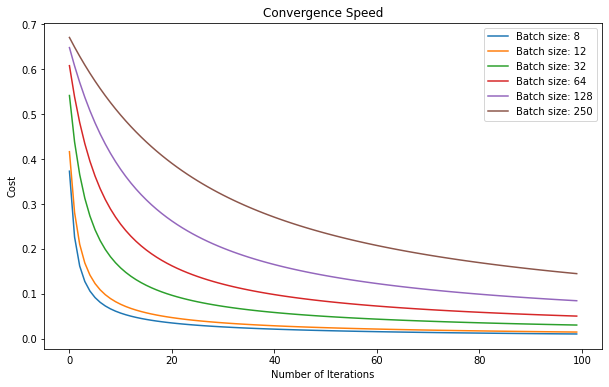

In [ ]:
plot_convergence_speed(model_histories, batch_sizes)